In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/driving_log.csv')

0.37752140000000006


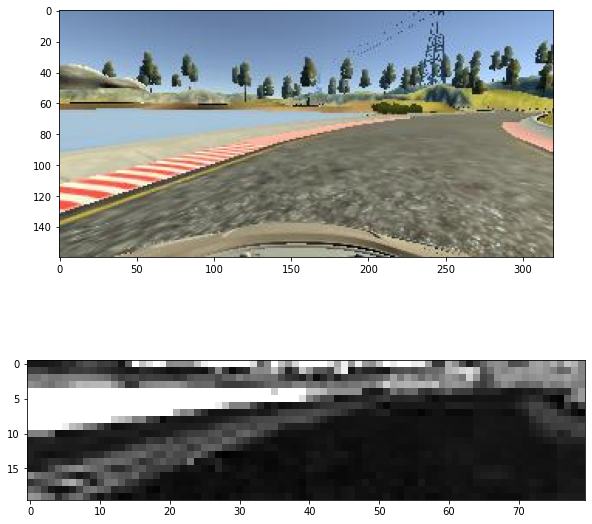

In [12]:
steering = 0

while (steering < 0.2):
    index = np.random.randint(len(df))
    steering = df.at[index, 'steering']

print(steering)
fig, axes = plt.subplots(2, 1, figsize=(10,10))

for i, key in enumerate(['center']):
    image = cv2.imread(os.path.join('data/IMG',
                                    df.at[index, key].split('/')[-1]))
    
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[0].imshow(rgb_image)
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    lower = np.array([80,0,0])
    upper = np.array([140,120,255])
    mask = cv2.inRange(hsv_image, lower, upper) == 255
    hsv_image[mask] = 255
    input_image = hsv_image[:,:,1]
    input_image = input_image / 255 - 0.5
    input_image = input_image[50:-30]
    input_image = cv2.resize(input_image, (input_image.shape[1]//2, input_image.shape[0]//2))
    input_image = cv2.resize(input_image, (input_image.shape[1]//2, input_image.shape[0]//2))
    #input_image = cv2.resize(input_image, (input_image.shape[1]//2, input_image.shape[0]//2))
    axes[1].imshow(input_image, cmap='gray')

In [62]:
input_image.shape

(20, 80)